## Exercício 3 - Replicando o gráfico de Minard

In [318]:
using DataFrames,Plots, VegaLite
using FilePaths, RDatasets

In [355]:
# RDatasets.dataset("datasets", "Minard.troops")
troops = RDatasets.dataset("HistData", "Minard.troops")
temp = RDatasets.dataset("HistData", "Minard.temp")
cities = RDatasets.dataset("HistData", "Minard.cities");

WARN Can not resolve event source: window
WARN Can not resolve event source: window
WARN Can not resolve event source: window
WARN Can not resolve event source: window


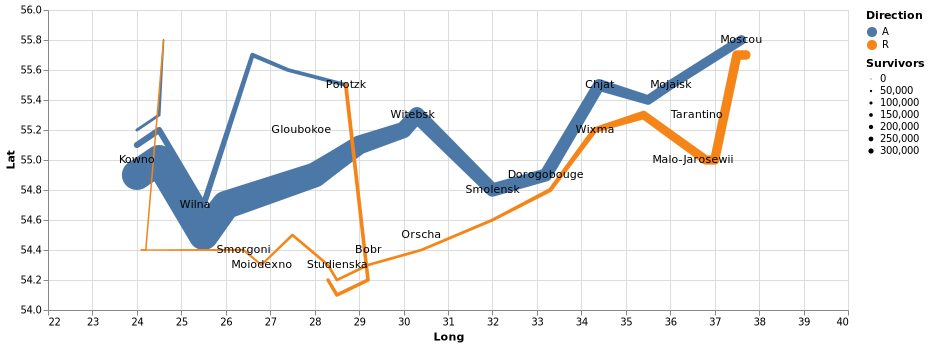

In [427]:
@vlplot(width=800, height=300) +
@vlplot(
    data=troops,
    mark={:trail,point=true,clip=true},
    x={"Long:q", scale={domain=[23,39]}},
    y={"Lat:q", scale ={domain = [54,56]}},
    size = {"Survivors:q", scale={"range" = [1,30]}},
    color="Direction:n",
    detail="Group:n",
    order ={field =:row, typ=:q },
    selection={
    grid={
            typ=:interval,
            resolve=:global,
            bind=:scales,
            translate="[mousedown[!event.shiftKey], window:mouseup] > window:mousemove!",
            zoom="wheel![!event.shiftKey]"
        }
    }
) + 
@vlplot(mark={:text},
    data=cities,
    x={"Long:q", scale={domain=[23,39]}},
    y={"Lat:q", scale ={domain = [54,56]}},
    text="City:n")